In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Step-by-step PCA with Python and Scikit-Learn

In this section, we will go through a step-by-step implementation of PCA using Python and Scikit-Learn. The steps involved are:

## Step 1: Import Libraries and Load Data

## Step 2: Standardize the Data

## Step 3: Compute Covariance Matrix

## Step 4: Compute Eigenvectors and Eigenvalues

## Step 5: Sort Eigenvalues in Descending Order

## Step 6: Choose Principal Components

## Step 7: Project Data Onto Lower-Dimensional Linear Subspace

In [22]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

df = pd.read_csv('data.csv')
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [23]:
X

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [24]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
cov_matrix = np.cov(X_scaled.T)

In [27]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [28]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [29]:
k = 2
principal_components = sorted_eigenvectors[:,:k]

In [30]:
X_new = np.dot(X_scaled, principal_components)
X_new

array([[ -9.18319983,   1.97127137],
       [ -2.38329766,  -3.75345877],
       [ -5.74247239,  -1.08035048],
       ...,
       [ -1.2518901 ,  -1.89397674],
       [-10.36503528,   1.69639755],
       [  5.47826365,  -0.67278804]])

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [35]:

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Perform PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Original shape: ", X.shape)
print("Transformed shape: ", X_pca.shape)


Original shape:  (569, 31)
Transformed shape:  (569, 2)


Original shape:  (569, 31)
Transformed shape:  (569, 4)


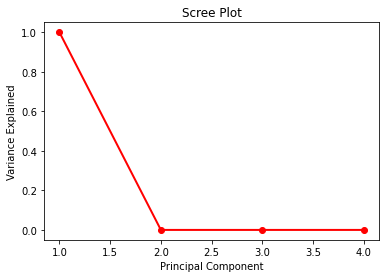

In [34]:

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Perform PCA with two components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

print("Original shape: ", X.shape)
print("Transformed shape: ", X_pca.shape)

# Calculate Variance Explained
var_exp = pca.explained_variance_ratio_

# Calculate Cumulative Variance Explained
cum_var_exp = np.cumsum(var_exp)

# Plot Scree Plot
plt.plot(range(1,len(var_exp)+1), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
